# Figure Generation for RAGAs Experiment

This notebook goes through how the figures for the BRAD paper were generated (with additional plots that did not make the final manuscript).

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt

In [37]:
#Save File
savefilepath = '/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/figs' #insert here


#Import csv with data
df = pd.read_csv('/nfs/turbo/umms-indikar/shared/projects/RAG/RAGAS2/machoi_labeled_ds.csv')

#Rename column names and entries
df['BRAD'] = df['BRAD'].replace('rag', 'Standard RAG')
df['BRAD'] = df['BRAD'].replace('enhanced', 'Enhanced RAG')
df['BRAD'] = df['BRAD'].replace('vanilla', 'Vanilla LLM')
df['question type'] = df['question type'].replace('simple', 'Simple')
df['question type'] = df['question type'].replace('multi_context', 'Multi Context')
df['question type'] = df['question type'].replace('reasoning', 'Reasoning')
brad_order = ['Vanilla LLM', 'Standard RAG', 'Enhanced RAG']
df['BRAD'] = pd.Categorical(df['BRAD'], categories=brad_order, ordered=True)

,Unnamed: 0,question,context,ground truth,question type,source,true,answer,answer_relevancy,faithfulness,context_recall,context_precision,answer_correctness,BRAD,machoi-labels,Computer Science,Mathematics,Biology
0,0,How do B cells undergo affinity maturation dur...,"[""'Affinity maturation\\nThe somatic mutation ...",B cells undergo affinity maturation during the...,Simple,[{'source': 'dynamics of b cells in germinal c...,True,"During the germinal center reaction, B cells u...",1.000000,0.142857,1.0,1.000000,0.715587,Vanilla LLM,b,False,False,True
1,1,How is the timely clearance of neutrophils cri...,"[""'and forma phagocytic cup that engulfs antig...",Timely clearance of neutrophils is critical fo...,Simple,[{'source': 'wound healing a cellular perspect...,True,BRAD: The timely clearance of neutrophils is c...,0.993118,0.500000,0.5,0.653362,0.466499,Vanilla LLM,b,False,False,True
2,2,How did Levinson and Smith use the method of p...,"[""'VI"" 'Th e metho d of Levinso n and Smith'\n...",Levinson and Smith used the method of proving ...,Simple,[{'source': 'theory of limit cycles'}],True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.500000,1.0,1.000000,0.215930,Vanilla LLM,m,False,True,False
3,3,What steps were involved in the PacBio library...,"[""'of PacBio UMI sequencing of rRNA operons of...",PacBio library preparation for the American Gu...,Simple,[{'source': 'high-accuracy long-read amplicon ...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.0,1.000000,0.210913,Vanilla LLM,b,False,False,True
4,4,How does Morse theory relate to the number of ...,"[""'270 An Overview of Floer Homology Theories ...",Morse theory relates to the number of critical...,Simple,[{'source': 'banyaga-hurtubise2004_book_lectur...,True,"I'm sorry, but I couldn't find specific inform...",0.000000,0.000000,1.0,0.968254,0.463782,Vanilla LLM,m,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,508,What advantage does CD9 offer in isolating mur...,"[""'A"" ', Underhill, T' 'M' ', and Bhatia, M' '...",The advantage of CD9 in isolating murine hemat...,Multi Context,[{'source': 'cooperative transcription factor ...,True,I don't have the specific information regardin...,0.000000,1.000000,1.0,0.604473,0.726860,Standard RAG,b,False,False,True
509,509,How is a rewriting event in GNA models defined...,"[""'Eandalsospecifiesthe\\ncorrespondenceofnode...",The rewriting event in GNA models is defined a...,Multi Context,[{'source': 'modeling complex systems with ada...,True,I don't have enough information to provide a s...,0.000000,0.000000,1.0,0.994786,0.220796,Standard RAG,m,False,True,False
510,510,How is fresh frozen tissue fixed with Formalde...,"[""'Immunoﬂuorescence staining\\nImmunoﬂuoresce...",The fresh frozen tissue sections are fixed wit...,Multi Context,[{'source': 'high-spatial-resolution multi-omi...,True,To fix fresh frozen tissue with Formaldehyde f...,0.978048,1.000000,1.0,0.905556,0.537682,Standard RAG,b,False,False,True
511,511,What causes unexplained stock market fluctuati...,"[""'decentralized networks, spontaneous\\noutbr...",The answer to given question is not present in...,Multi Context,"[{'source': 'strogatzsync'}, {'source': 'strog...",True,The unexplained stock market fluctuations attr...,0.996494,0.571429,1.0,0.000000,0.178494,Standard RAG,c,True,False,False


/tmp/ipykernel_3983779/2871267627.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='question type', y=y_col, hue='BRAD', palette='Set3', ci=None, ax=ax)
/tmp/ipykernel_3983779/2871267627.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='question type', y=y_col, hue='BRAD', palette='Set3', ci=None, ax=ax)
/tmp/ipykernel_3983779/2871267627.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='question type', y=y_col, hue='BRAD', palette='Set3', ci=None, ax=ax)
/tmp/ipykernel_3983779/2871267627.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='question type', y=y_col, hue='BRAD', palette='Set3', ci=None, ax=ax)
/tmp/ipykernel_3983779/2871267627.py:22: FutureWarning: 

The `ci` parameter is depr

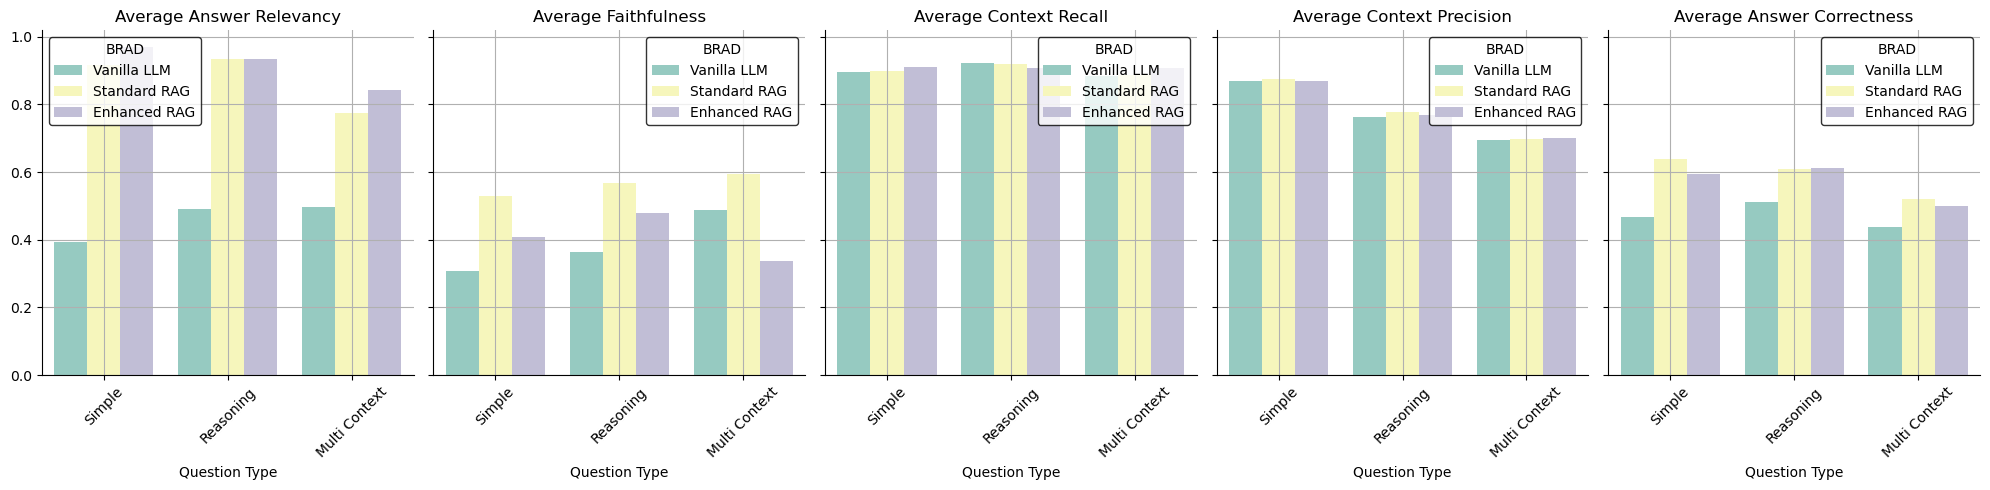

In [50]:
y_data_columns = [
    'answer_relevancy',
    'faithfulness',
    'context_recall',
    'context_precision',
    'answer_correctness'
]

y_column_titles = [
    'Answer Relevancy',
    'Faithfulness',
    'Context Recall',
    'Context Precision',
    'Answer Correctness'
]

# Create a figure and a grid of subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Iterate over the y-data columns and axes
for ax, y_col, y_title in zip(axes, y_data_columns, y_column_titles):
    sns.barplot(data=df, x='question type', y=y_col, hue='BRAD', palette='Set3', ci=None, ax=ax)
    ax.set_title(f'Average {y_title}')
    ax.set_xlabel('Question Type')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    
    # Add legend with black border
    legend = ax.get_legend()
    if legend:
        legend.set_title('BRAD')
        legend.get_frame().set_edgecolor('black')  # Set the border color of the legend

# Adjust layout to prevent overlap
plt.tight_layout()
sns.despine()

# Save the combined figure
fig_file_name = 'full_data.png'
save_name = os.path.join(savefilepath, fig_file_name)
plt.savefig(save_name, dpi=300)

plt.show()

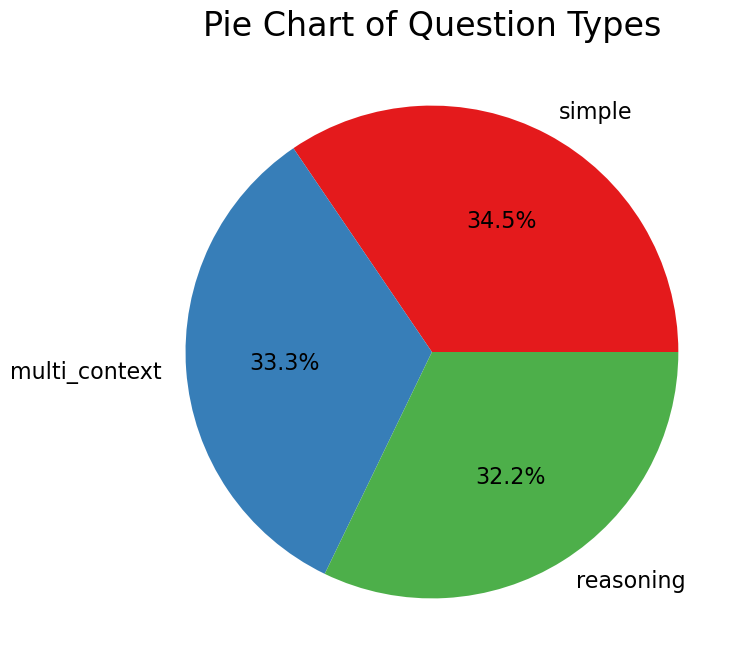

In [109]:

# Set the figure size
plt.figure(figsize=(8, 8))

# Calculate the counts for each question type
counts = df['question type'].value_counts()

# Create the pie chart with larger text
plt.pie(
    counts, 
    labels=counts.index, 
    autopct='%1.1f%%', 
    colors=sns.color_palette('Set1'),
    textprops={'fontsize': 16}  # Adjust the font size for labels and percentages
)

# Set the title with larger text
plt.title('Pie Chart of Question Types', fontsize=24)

# Save the figure
fig_file_name = 'question_type.png'
save_name = os.path.join(savefilepath, fig_file_name)
plt.savefig(save_name, dpi=300)

# Show the figure
plt.show()


/tmp/ipykernel_2544437/2239000338.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


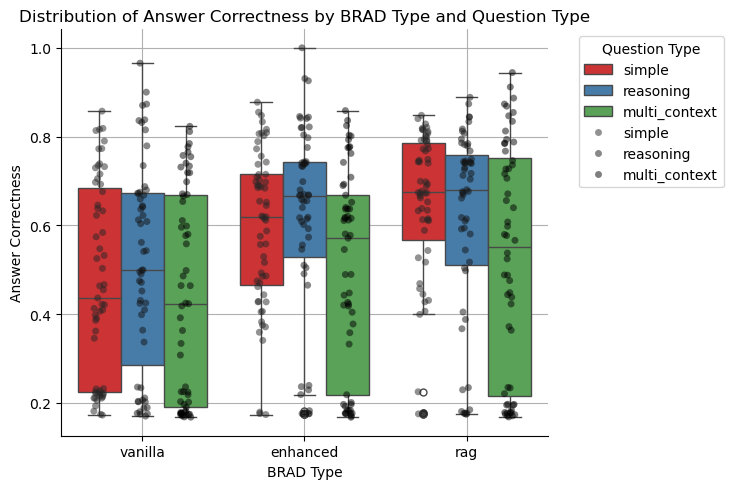

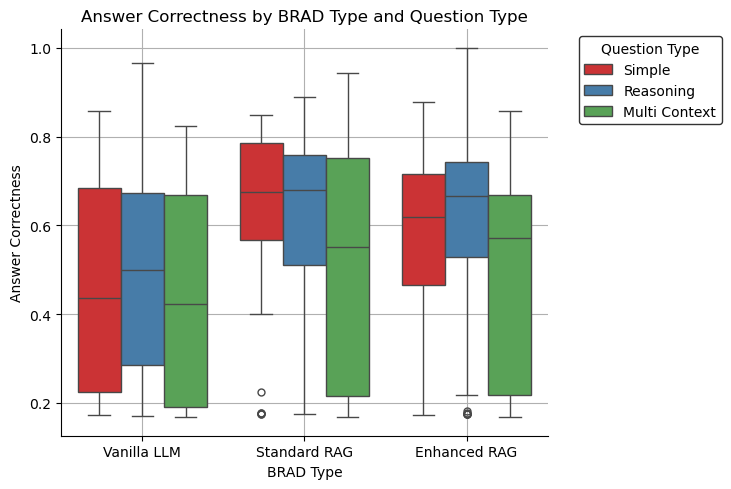

In [49]:


# Create the boxplot using seaborn
g = sns.catplot(
    data=df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Adjust legend to avoid duplication
g._legend.remove()  # Remove the default legend
legend = plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_edgecolor('black')  # Set the border color of the legend

# Set title and labels
plt.title('Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300
fig_file_name = 'answer_correctness_by_brad_type_and_question_type.png'
save_name = os.path.join(savefilepath, fig_file_name)
plt.savefig(save_name, dpi=300)

plt.show()


In [ ]:
# Calculate variance of 'answer_correctness' grouped by 'BRAD' and 'question type'
variance = df.groupby(['BRAD', 'question type'])['answer_correctness'].var().reset_index()
variance.columns = ['BRAD', 'Question Type', 'Variance']

print("Variance of Answer Correctness:")
print(variance)

# Create the boxplot and stripplot using seaborn
g = sns.catplot(
    data=df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness by BRAD Type and Question Type')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()

# Save the figure with dpi=300

fig_file_name = 'answer_correctness_by_brad_type_and_subject_type.png'
save_name = os.path.join(savefilepath, fig_file_name)
print(type(save_name))
#plt.savefig(save_name, dpi=300)
plt.show()


/tmp/ipykernel_3983779/587881889.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


<class 'str'>


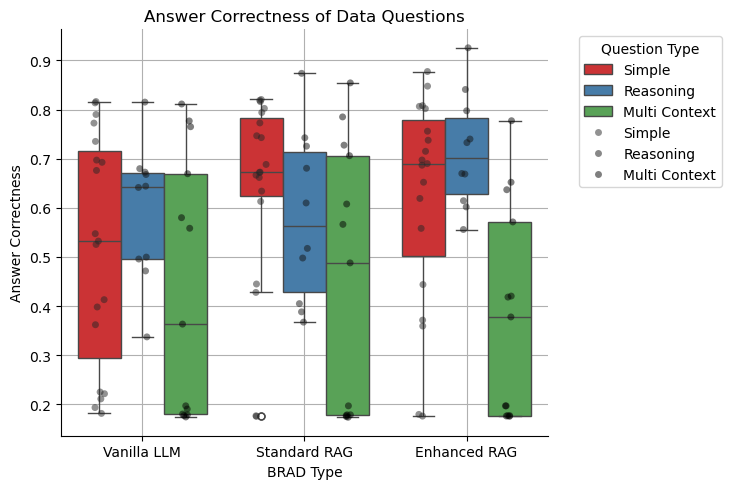

In [48]:
cs_df = df[df['Computer Science']]
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=cs_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=cs_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Answer Correctness of Data Questions')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()


fig_file_name = 'cs_data.png'
save_name = os.path.join(savefilepath, fig_file_name)
print(type(save_name))
plt.savefig(save_name, dpi=300)
plt.show()



/tmp/ipykernel_2544437/811079440.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


<class 'str'>


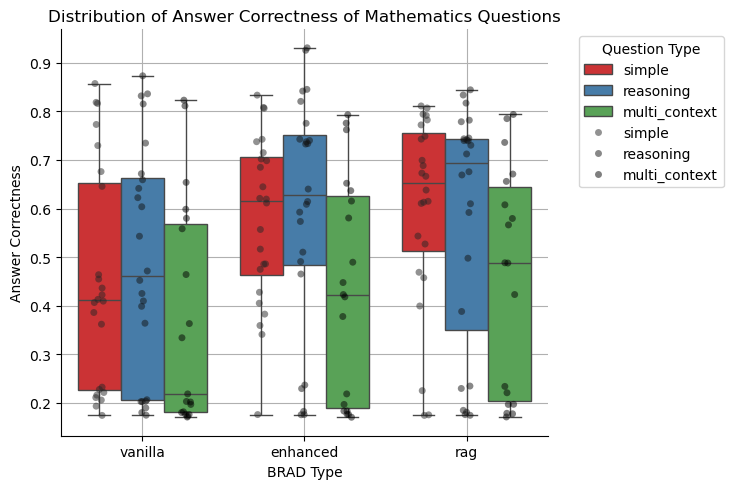

In [27]:
cs_df = df[df['Mathematics']]

# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=cs_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=cs_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness of Mathematics Questions')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()


fig_file_name = 'math_data.png'
save_name = os.path.join(savefilepath, fig_file_name)
print(type(save_name))
plt.savefig(save_name, dpi=300)
plt.show()



/tmp/ipykernel_2544437/202083855.py:18: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


<class 'str'>


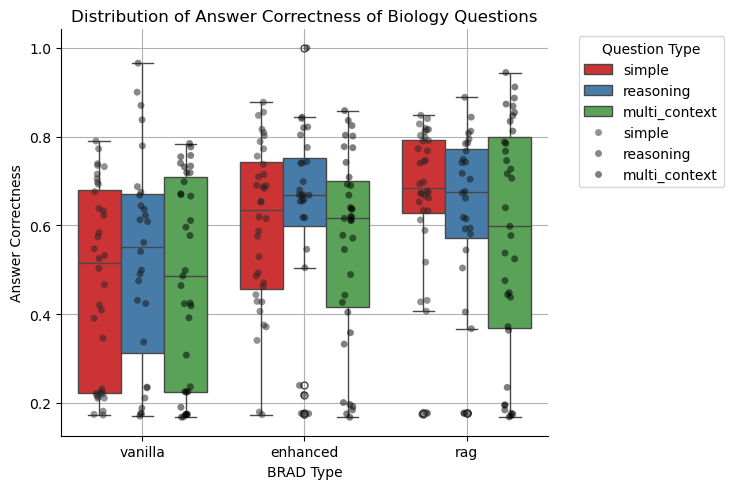

In [28]:
cs_df = df[df['Biology']]
# Set the figure size using height and aspect (width = height * aspect)
g = sns.catplot(
    data=cs_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Add stripplot on top of boxplot for individual data points
sns.stripplot(
    data=cs_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    dodge=True, 
    color='black', 
    alpha=0.5, 
    jitter=True, 
    ax=g.ax
)

# Adjust legend to avoid duplication
g._legend.remove()
plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Answer Correctness of Biology Questions')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.tight_layout()


fig_file_name = 'bio_data.png'
save_name = os.path.join(savefilepath, fig_file_name)
print(type(save_name))
plt.savefig(save_name, dpi=300)
plt.show()



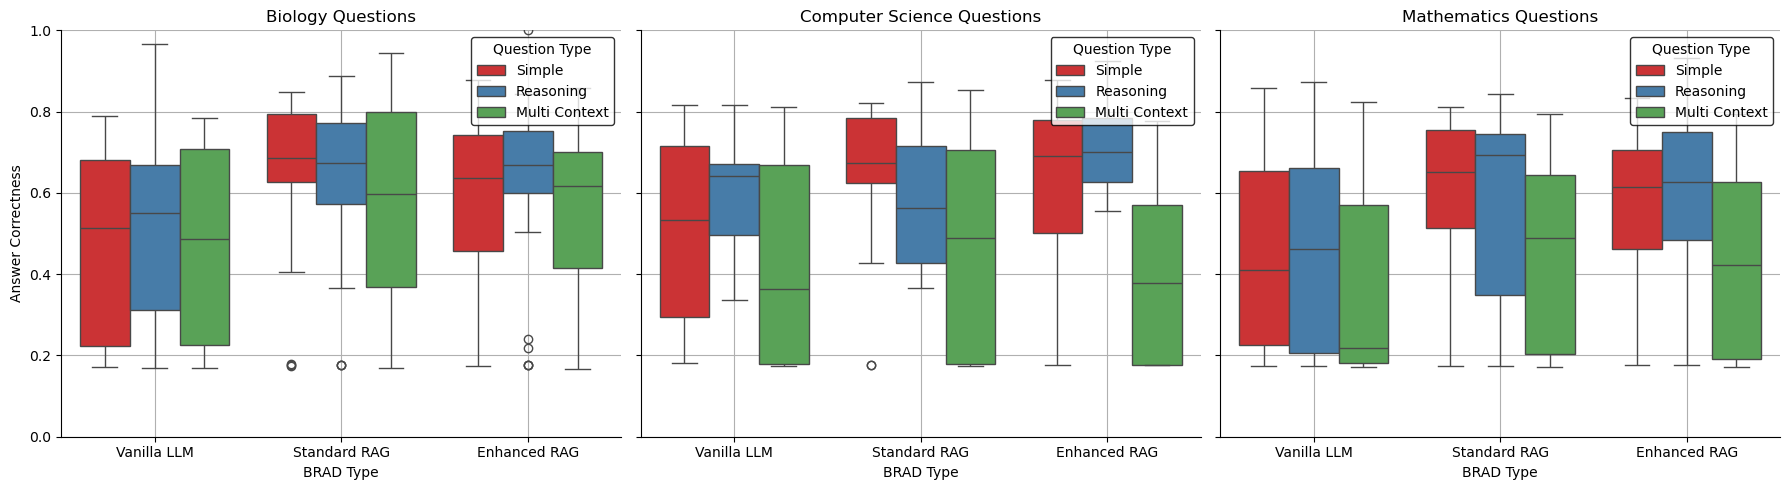

In [46]:
# Filter data for each subject
biology_df = df[df['Biology']]
cs_df = df[df['Computer Science']]
math_df = df[df['Mathematics']]

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Define a common style for the boxplots
boxplot_params = {
    'x': 'BRAD',
    'y': 'answer_correctness',
    'hue': 'question type',
    'palette': 'Set1',
}

# Plot Biology data
sns.boxplot(data=biology_df, ax=axes[0], **boxplot_params)
axes[0].set_title('Biology Questions')
axes[0].set_xlabel('BRAD Type')
axes[0].set_ylabel('Answer Correctness')
axes[0].set_ylim([0, 1])
axes[0].grid(True)

# Plot Computer Science data
sns.boxplot(data=cs_df, ax=axes[1], **boxplot_params)
axes[1].set_title('Computer Science Questions')
axes[1].set_xlabel('BRAD Type')
axes[1].set_ylabel('Answer Correctness')
axes[1].set_ylim([0, 1])
axes[1].grid(True)

# Plot Mathematics data
sns.boxplot(data=math_df, ax=axes[2], **boxplot_params)
axes[2].set_title('Mathematics Questions')
axes[2].set_xlabel('BRAD Type')
axes[2].set_ylabel('Answer Correctness')
axes[2].set_ylim([0, 1])
axes[2].grid(True)

# Add legends with black border and capitalize the legend title
for ax in axes:
    legend = ax.get_legend()
    if legend:
        # Capitalize the legend title
        legend.set_title('Question Type')
        legend.get_frame().set_edgecolor('black')
        legend.set_loc('upper right')  # Adjust the location within the bounding box

# Adjust layout to prevent overlap
plt.tight_layout()
sns.despine()

# Save the combined figure
fig_file_name = 'combined_data.png'
save_name = os.path.join(savefilepath, fig_file_name)
plt.savefig(save_name, dpi=300)

plt.show()

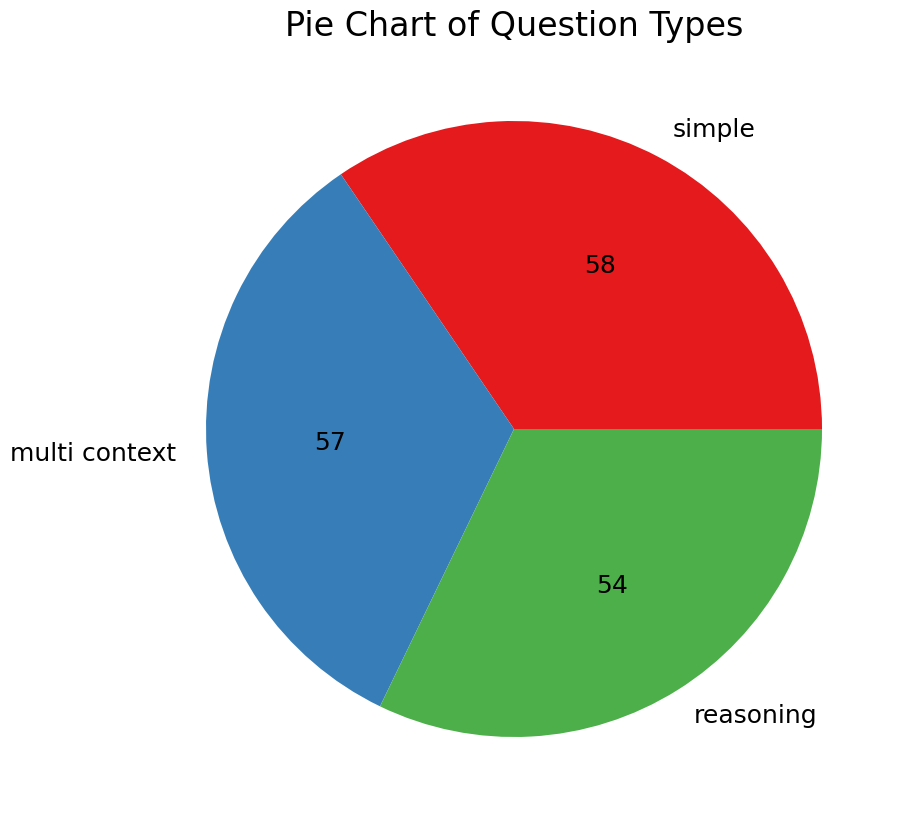

In [9]:
# Ensure 'multi_context' is replaced with 'multi\ncontext' in the DataFrame
df['question type'] = df['question type'].replace('multi_context', 'multi\ncontext')

# Set the figure size
plt.figure(figsize=(10, 10))

# Calculate the counts for each question type
counts = df['question type'].value_counts() / 3

# Custom function to format the labels with total counts
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute}'

# Create the pie chart with counts instead of percentages
plt.pie(
    counts, 
    labels=counts.index, 
    autopct=lambda pct: func(pct, counts),
    colors=sns.color_palette('Set1'),
    textprops={'fontsize': 18}  # Adjust the font size for labels and counts
)

# Set the title with larger text
plt.title('Pie Chart of Question Types', fontsize=24)

# Save the figure
fig_file_name = 'question_type.png'
save_name = os.path.join(savefilepath, fig_file_name)
plt.savefig(save_name, dpi=400)

# Show the figure
plt.show()


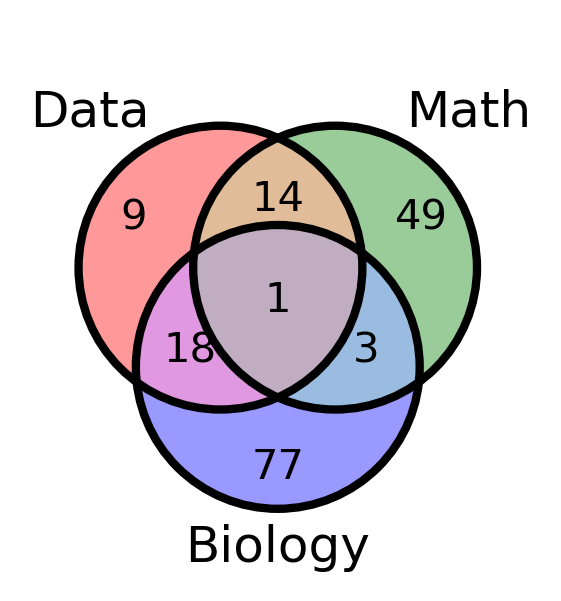

In [3]:


# Count the sets: CS, Math, Bio
cs = df['Computer Science']
math = df['Mathematics']
bio = df['Biology']

# Calculate the sizes for the Venn diagram
subset_sizes = {
    '100': int(sum(cs & ~math & ~bio)/3),  # Only Computer Science
    '010': int(sum(~cs & math & ~bio)/3),  # Only Mathematics
    '001': int(sum(~cs & ~math & bio)/3),  # Only Biology
    '110': int(sum(cs & math & ~bio)/3),   # Computer Science and Mathematics
    '101': int(sum(cs & ~math & bio)/3),   # Computer Science and Biology
    '011': int(sum(~cs & math & bio)/3),   # Mathematics and Biology
    '111': int(sum(cs & math & bio)/3)     # All three
}

# Create the Venn diagram with equal-sized circles
plt.figure(figsize=(2,2), dpi=300)
venn = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels=('Data', 'Math', 'Biology'))
venn_circles = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1))

# Update the labels with the actual subset sizes
for idx, label in enumerate(['100', '010', '001', '110', '101', '011', '111']):
    venn.get_label_by_id(label).set_text(subset_sizes[label])

# Add a title
plt.title(" ")

# Save the figure
fig_file_name = 'topic_type.png'
save_name = os.path.join(savefilepath, fig_file_name)
plt.savefig(save_name, dpi=300)
plt.show()


6       Vanilla LLM
7       Vanilla LLM
8       Vanilla LLM
10      Vanilla LLM
11      Vanilla LLM
           ...     
484    Standard RAG
487    Standard RAG
488    Standard RAG
502    Standard RAG
506    Standard RAG
Name: BRAD, Length: 108, dtype: category
Categories (3, object): ['Vanilla LLM' < 'Standard RAG' < 'Enhanced RAG']
Variance of Answer Correctness:
           BRAD  Question Type  Variance
0   Vanilla LLM  Multi Context  0.066923
1   Vanilla LLM      Reasoning  0.023450
2   Vanilla LLM         Simple  0.055139
3  Standard RAG  Multi Context  0.073771
4  Standard RAG      Reasoning  0.019517
5  Standard RAG         Simple  0.048702
6  Enhanced RAG  Multi Context  0.052464
7  Enhanced RAG      Reasoning  0.010810
8  Enhanced RAG         Simple  0.050656


/tmp/ipykernel_3983779/3646363980.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variance = filtered_df.groupby(['BRAD', 'question type'])['answer_correctness'].var().reset_index()


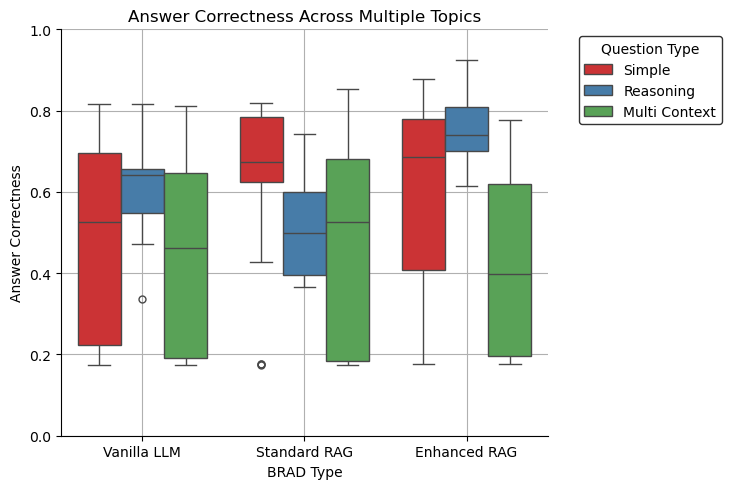

In [47]:
df['True_Count'] = df[['Biology', 'Computer Science', 'Mathematics']].sum(axis=1)
filtered_df = df[df['True_Count'] > 1].drop(columns=['True_Count'])

print(filtered_df['BRAD'])
# Calculate variance
variance = filtered_df.groupby(['BRAD', 'question type'])['answer_correctness'].var().reset_index()
variance.columns = ['BRAD', 'Question Type', 'Variance']

print("Variance of Answer Correctness:")
print(variance)

# Reorder BRAD categories
brad_order = ['Vanilla LLM', 'Standard RAG', 'Enhanced RAG']  # Swap the order as needed
filtered_df['BRAD'] = pd.Categorical(filtered_df['BRAD'], categories=brad_order, ordered=True)

# Create the boxplot using seaborn
g = sns.catplot(
    data=filtered_df, 
    x='BRAD', 
    y='answer_correctness', 
    hue='question type', 
    kind='box', 
    palette='Set1', 
    height=5,    # Equivalent to figsize height (5 inches)
    aspect=1.2   # Aspect ratio: width/height = 3/5 = 0.6
)

# Remove the default legend and add a custom one with a black border
g._legend.remove()
legend = plt.legend(title='Question Type', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_edgecolor('black')  # Set the border color of the legend

plt.title('Answer Correctness Across Multiple Topics')
plt.xlabel('BRAD Type')
plt.ylabel('Answer Correctness')
plt.grid(True)
plt.ylim([0, 1])
plt.tight_layout()
sns.despine()

# Save the figure with dpi=300
fig_file_name = 'answer_correctness_multi_subject.png'
save_name = os.path.join(savefilepath, fig_file_name)
plt.savefig(save_name, dpi=300)

plt.show()